# Trabajo práctico integrador - Análisis de datos

## Limpieza y preparación de datos / Ingeniería de features

In [1]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 4.0 MB/s 
     |████████████████████████████████| 120 kB 41.2 MB/s 
     |████████████████████████████████| 1.4 MB 41.8 MB/s 
     |████████████████████████████████| 281 kB 45.1 MB/s 
     |████████████████████████████████| 69 kB 6.0 MB/s 
     |████████████████████████████████| 9.8 MB 27.8 MB/s 
     |████████████████████████████████| 106 kB 52.7 MB/s 
     |████████████████████████████████| 6.7 MB 29.8 MB/s 
     |████████████████████████████████| 11.2 MB 43.1 MB/s 
     |████████████████████████████████| 2.0 MB 38.6 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 3.3 MB 32.8 MB/s 
     |████████████████████████████████| 79.9 MB 150 kB/s 
     |████████████████████████████████| 930 kB 68.7 MB/s 
     |███████████████████████████████

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, KBinsDiscretizer, PowerTransformer
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

import pickle

In [2]:
# Set color palette
color = ['#1ED760', '#FAF5F5']
sns.set_palette(sns.color_palette(color))

In [3]:
# Load dataset from GitHub repository
df_original = pd.read_csv('data_playlist.csv')
df = df_original.copy(deep=True)

In [4]:
# Show first 10 rows
df.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.524,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.597,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.452,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.748,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.913,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


In [5]:
# Show dataset shape
df.shape

(750, 14)

## 1. Análisis de datos faltantes

In [6]:
df.isna().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

- No se evidencia la presencia de valores faltantes ni nulos, por este motivo, no se aplican técnicas de imputación.

## 2. Pre-procesamiento de las variables

In [7]:
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']
categorical_features = ['key', 'mode', 'time_signature']
special_categorical_features = ['tempo']

In [8]:
X = df[numerical_features + categorical_features + special_categorical_features]
y = df['label']

In [9]:
def print_info(var, is_numeric=True):
    print("*" * 50)
    print(f"Variable: {var}")
    cant_unique = len(df[var].unique())
    if is_numeric:
        print(f"La variable oscila entre los siguientes valores: {df[var].min()} - {df[var].max()}")
    else:
        
        if cant_unique < 10:
            print(f"Categorías: {df[var].unique()}")
    print(f"La variable tiene {cant_unique} valores únicos")

### Definición de las técnicas a utilizar:

### 1. Variables numéricas:

### Información

In [10]:
for var in numerical_features:
    print_info(var)

**************************************************
Variable: acousticness
La variable oscila entre los siguientes valores: 1.17e-06 - 0.994
La variable tiene 596 valores únicos
**************************************************
Variable: danceability
La variable oscila entre los siguientes valores: 0.107 - 0.986
La variable tiene 458 valores únicos
**************************************************
Variable: energy
La variable oscila entre los siguientes valores: 0.00925 - 0.995
La variable tiene 502 valores únicos
**************************************************
Variable: instrumentalness
La variable oscila entre los siguientes valores: 0.0 - 0.967
La variable tiene 431 valores únicos
**************************************************
Variable: liveness
La variable oscila entre los siguientes valores: 0.024 - 0.979
La variable tiene 445 valores únicos
**************************************************
Variable: loudness
La variable oscila entre los siguientes valores: -29.601 - -0.5

### Técnicas a utilizar

- **Feature Scaling**: Estandarización, Escalado a mínimo-máximo
- **Transformación de variables**: Yeo-Johnson (debido a que admite variables positivas y negativas)

### 2. Variables categóricas

### Información

In [11]:
for var in categorical_features:
    print_info(var, is_numeric=False)

**************************************************
Variable: key
La variable tiene 12 valores únicos
**************************************************
Variable: mode
Categorías: [0 1]
La variable tiene 2 valores únicos
**************************************************
Variable: time_signature
Categorías: [4 3 5 1]
La variable tiene 4 valores únicos


In [12]:
print_info('tempo')

**************************************************
Variable: tempo
La variable oscila entre los siguientes valores: 55.747 - 204.162
La variable tiene 729 valores únicos


### Técnicas a utilizar

**Variables**:
- key
- mode
- tempo

Codificación: One-Hot-Encoding

**Variable**:
time_Signature

Codificación: Discretización (binning) + One-Hot-Encoding

## Pipelines de pre-procesamiento

#### Pipelines variables numéricas

In [13]:
numeric_std_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('power', PowerTransformer(method='yeo-johnson'))])

In [14]:
numeric_minmax_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('power', PowerTransformer(method='yeo-johnson'))])

#### Pipelines variables categóricas

In [15]:
categorical_binning = KBinsDiscretizer(n_bins=10, encode='onehot' , strategy='uniform' )

In [16]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

### Column transformer

In [17]:
preprocessor_std = ColumnTransformer(
    transformers=[
        ('num', numeric_std_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('cat_bin', categorical_binning, special_categorical_features)])

In [18]:
preprocessor_min_max = ColumnTransformer(
    transformers=[
        ('num', numeric_minmax_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('cat_bin', categorical_binning, special_categorical_features)])

### Pipeline 

In [19]:
preprocessing_std = Pipeline(steps=[('preprocessor', preprocessor_std),])

In [20]:
preprocessing_min_max = Pipeline(steps=[('preprocessor', preprocessor_min_max),])

### Experimentation

#### Define models

In [21]:
logistic_regresion_std_model = Pipeline(steps=[('preprocessor', preprocessing_std),
                       ('classifier', LogisticRegression())])

In [22]:
logistic_regresion_min_max_model = Pipeline(steps=[('preprocessor', preprocessing_min_max),
                       ('classifier', LogisticRegression())])

In [23]:
decision_tree_std_pipe = Pipeline(steps=[('preprocessor', preprocessing_std),
                       ('classifier', DecisionTreeClassifier())])

In [24]:
decision_tree_min_max_pipe = Pipeline(steps=[('preprocessor', preprocessing_min_max),
                       ('classifier', DecisionTreeClassifier())])

In [25]:
random_forest_std_pipe = Pipeline(steps=[('preprocessor', preprocessing_std),
                       ('classifier', RandomForestClassifier())])

In [26]:
random_forest_std_pipe = Pipeline(steps=[('preprocessor', preprocessing_min_max),
                       ('classifier', RandomForestClassifier())])

In [27]:
param_grid = {
    'classifier__max_depth': [15, 30, 45],
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
}

In [28]:
random_forest_params = {
    'classifier__n_estimators': [50, 100, 150],
}

In [29]:
param_grid_random_forest = dict(param_grid)
param_grid_random_forest.update(random_forest_params)

In [30]:
# Grid Search - Models
gs_decision_tree_std = GridSearchCV(decision_tree_std_pipe, param_grid, cv=5, n_jobs=-1, verbose=3)
gs_decision_tree_min_max = GridSearchCV(decision_tree_min_max_pipe, param_grid, cv=5, n_jobs=-1, verbose=3)

gs_random_forest_std = GridSearchCV(random_forest_std_pipe, param_grid, cv=5, n_jobs=-1, verbose=3)
gs_random_forest_min_max = GridSearchCV(random_forest_std_pipe, param_grid, cv=5, n_jobs=-1, verbose=3)

#### Metric report

In [31]:
def metric_report(y_test, y_pred, y_proba):  
    print(classification_report(y_test, y_pred))  
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test, y_proba[:,1]), 4)) 
    precision, recall,threshold=precision_recall_curve(y_test, y_proba[:,1]);
    print('Area bajo la curva Precision-Recall:',np.round(auc(recall, precision), 4))

#### Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Experimentation

#### 1. Logistic Regression - Numeric: Standard Scaler + Yeo-Jhonson

In [33]:
logistic_regresion_std_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler()),
                                                                                   ('power',
                                                                                    PowerTransformer())]),
                                                                   ['acousticness',
                                                                    'danceability',
                                                                    'energy',
                                                                    'instrumentalness',
                                                                    'liveness',
                                

In [34]:
y_pred = logistic_regresion_std_model.predict(X_test)
y_proba = logistic_regresion_std_model.predict_proba(X_test)

In [35]:
metric_report(y_test, y_pred, y_proba)

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        54
           1       0.85      0.79      0.82        96

    accuracy                           0.78       150
   macro avg       0.76      0.78      0.77       150
weighted avg       0.79      0.78      0.78       150

Area bajo la curva ROC: 0.8773
Area bajo la curva Precision-Recall: 0.9142


#### 2. Logistic Regression - Numeric: MinMax + Yeo-Jhonson 

In [36]:
logistic_regresion_min_max_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    MinMaxScaler()),
                                                                                   ('power',
                                                                                    PowerTransformer())]),
                                                                   ['acousticness',
                                                                    'danceability',
                                                                    'energy',
                                                                    'instrumentalness',
                                                                    'liveness',
                                  

In [37]:
y_pred = logistic_regresion_std_model.predict(X_test)
y_proba = logistic_regresion_std_model.predict_proba(X_test)

In [38]:
metric_report(y_test, y_pred, y_proba)

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        54
           1       0.85      0.79      0.82        96

    accuracy                           0.78       150
   macro avg       0.76      0.78      0.77       150
weighted avg       0.79      0.78      0.78       150

Area bajo la curva ROC: 0.8773
Area bajo la curva Precision-Recall: 0.9142


### Decision Tree

#### Decision tree: Numeric: Standard Scaler

In [39]:
gs_decision_tree_std.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sk

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('scaler',
                                                                                                           StandardScaler()),
                                                                                                          ('power',
                                                                                                           PowerTransformer())]),
                                                                                          ['acousticness',
                                                                                           'danceability',
                                                    

In [40]:
pd.DataFrame(gs_decision_tree_std.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068156,0.006527,0.013855,0.002978,gini,15,"{'classifier__criterion': 'gini', 'classifier_...",0.783333,0.800000,0.725000,0.783333,0.741667,0.766667,0.028382,5
1,0.064942,0.002721,0.015250,0.002735,gini,30,"{'classifier__criterion': 'gini', 'classifier_...",0.825000,0.850000,0.741667,0.775000,0.725000,0.783333,0.047726,2
2,0.070769,0.007659,0.017422,0.006172,gini,45,"{'classifier__criterion': 'gini', 'classifier_...",0.791667,0.808333,0.733333,0.766667,0.716667,0.763333,0.034400,6
3,0.070863,0.005215,0.013143,0.000523,entropy,15,"{'classifier__criterion': 'entropy', 'classifi...",0.808333,0.775000,0.733333,0.783333,0.766667,0.773333,0.024381,4
4,0.066167,0.004657,0.012998,0.000752,entropy,30,"{'classifier__criterion': 'entropy', 'classifi...",0.808333,0.791667,0.725000,0.825000,0.750000,0.780000,0.037118,3
5,0.066443,0.003665,0.013250,0.000715,entropy,45,"{'classifier__criterion': 'entropy', 'classifi...",0.808333,0.800000,0.750000,0.808333,0.750000,0.783333,0.027386,1
6,0.064750,0.010312,0.000000,0.000000,log_loss,15,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.058962,0.005069,0.000000,0.000000,log_loss,30,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,0.054350,0.008642,0.000000,0.000000,log_loss,45,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [41]:
gs_decision_tree_std.best_estimator_

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler()),
                                                                                   ('power',
                                                                                    PowerTransformer())]),
                                                                   ['acousticness',
                                                                    'danceability',
                                                                    'energy',
                                                                    'instrumentalness',
                                                                    'liveness',
                                

In [42]:
gs_decision_tree_std.best_score_

0.7833333333333334

In [43]:
y_pred = gs_decision_tree_std.predict(X_test)
y_proba = gs_decision_tree_std.predict_proba(X_test)

In [44]:
metric_report(y_test, y_pred, y_proba)

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        54
           1       0.90      0.80      0.85        96

    accuracy                           0.81       150
   macro avg       0.80      0.82      0.80       150
weighted avg       0.83      0.81      0.82       150

Area bajo la curva ROC: 0.8177
Area bajo la curva Precision-Recall: 0.912


#### Decision tree: Numeric: Min - Max

In [45]:
gs_decision_tree_min_max.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sk

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('scaler',
                                                                                                           MinMaxScaler()),
                                                                                                          ('power',
                                                                                                           PowerTransformer())]),
                                                                                          ['acousticness',
                                                                                           'danceability',
                                                      

In [46]:
pd.DataFrame(gs_decision_tree_min_max.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076269,0.012705,0.013034,0.000365,gini,15,"{'classifier__criterion': 'gini', 'classifier_...",0.800000,0.816667,0.758333,0.791667,0.691667,0.771667,0.044284,3
1,0.068748,0.009282,0.012938,0.000374,gini,30,"{'classifier__criterion': 'gini', 'classifier_...",0.816667,0.833333,0.758333,0.775000,0.733333,0.783333,0.036893,2
2,0.067674,0.004606,0.014174,0.001941,gini,45,"{'classifier__criterion': 'gini', 'classifier_...",0.808333,0.775000,0.725000,0.766667,0.716667,0.758333,0.033747,6
3,0.074336,0.005646,0.012889,0.001900,entropy,15,"{'classifier__criterion': 'entropy', 'classifi...",0.783333,0.766667,0.725000,0.800000,0.775000,0.770000,0.025055,4
4,0.065870,0.004161,0.013681,0.002618,entropy,30,"{'classifier__criterion': 'entropy', 'classifi...",0.791667,0.766667,0.725000,0.800000,0.750000,0.766667,0.027386,5
5,0.068242,0.008253,0.016124,0.003832,entropy,45,"{'classifier__criterion': 'entropy', 'classifi...",0.816667,0.783333,0.741667,0.808333,0.783333,0.786667,0.026141,1
6,0.060701,0.003190,0.000000,0.000000,log_loss,15,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.063943,0.005270,0.000000,0.000000,log_loss,30,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,0.059132,0.007451,0.000000,0.000000,log_loss,45,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [47]:
gs_decision_tree_min_max.best_estimator_

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    MinMaxScaler()),
                                                                                   ('power',
                                                                                    PowerTransformer())]),
                                                                   ['acousticness',
                                                                    'danceability',
                                                                    'energy',
                                                                    'instrumentalness',
                                                                    'liveness',
                                  

In [48]:
gs_decision_tree_min_max.best_score_

0.7866666666666667

In [49]:
y_pred = gs_decision_tree_min_max.predict(X_test)
y_proba = gs_decision_tree_min_max.predict_proba(X_test)

In [50]:
metric_report(y_test, y_pred, y_proba)

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        54
           1       0.92      0.80      0.86        96

    accuracy                           0.83       150
   macro avg       0.81      0.84      0.82       150
weighted avg       0.84      0.83      0.83       150

Area bajo la curva ROC: 0.8362
Area bajo la curva Precision-Recall: 0.9227


In [51]:
# save the model
filename = 'decision_tree_min_max.sav'
pickle.dump(gs_decision_tree_min_max, open(filename, 'wb'))

### Random Forest

#### Random Forest - Numeric: Standard Scaler

In [52]:
gs_random_forest_std.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packag

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('scaler',
                                                                                                           MinMaxScaler()),
                                                                                                          ('power',
                                                                                                           PowerTransformer())]),
                                                                                          ['acousticness',
                                                                                           'danceability',
                                                      

In [53]:
pd.DataFrame(gs_random_forest_std.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.355457,0.013918,0.041282,0.004033,gini,15,"{'classifier__criterion': 'gini', 'classifier_...",0.816667,0.883333,0.800000,0.883333,0.808333,0.838333,0.037118,1
1,0.362475,0.008755,0.037450,0.002517,gini,30,"{'classifier__criterion': 'gini', 'classifier_...",0.791667,0.866667,0.800000,0.833333,0.783333,0.815000,0.030912,5
2,0.354394,0.011925,0.038819,0.004215,gini,45,"{'classifier__criterion': 'gini', 'classifier_...",0.808333,0.875000,0.800000,0.866667,0.783333,0.826667,0.037044,2
3,0.394657,0.006272,0.033510,0.001369,entropy,15,"{'classifier__criterion': 'entropy', 'classifi...",0.791667,0.866667,0.791667,0.850000,0.800000,0.820000,0.031885,3
4,0.391688,0.007956,0.032087,0.000652,entropy,30,"{'classifier__criterion': 'entropy', 'classifi...",0.791667,0.858333,0.775000,0.866667,0.783333,0.815000,0.039229,5
5,0.395166,0.002187,0.031859,0.000220,entropy,45,"{'classifier__criterion': 'entropy', 'classifi...",0.791667,0.866667,0.791667,0.866667,0.766667,0.816667,0.041833,4
6,0.134951,0.005815,0.000000,0.000000,log_loss,15,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.138976,0.009857,0.000000,0.000000,log_loss,30,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,0.121895,0.016392,0.000000,0.000000,log_loss,45,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [54]:
gs_random_forest_std.best_estimator_

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    MinMaxScaler()),
                                                                                   ('power',
                                                                                    PowerTransformer())]),
                                                                   ['acousticness',
                                                                    'danceability',
                                                                    'energy',
                                                                    'instrumentalness',
                                                                    'liveness',
                                  

In [55]:
gs_random_forest_std.best_score_

0.8383333333333333

In [56]:
y_pred = gs_random_forest_std.predict(X_test)
y_proba = gs_random_forest_std.predict_proba(X_test)

In [57]:
metric_report(y_test, y_pred, y_proba)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        54
           1       0.91      0.83      0.87        96

    accuracy                           0.84       150
   macro avg       0.83      0.84      0.83       150
weighted avg       0.85      0.84      0.84       150

Area bajo la curva ROC: 0.9111
Area bajo la curva Precision-Recall: 0.9444


#### Random Forest - Numeric: Min Max Scaler


In [58]:
gs_random_forest_min_max.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packag

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('scaler',
                                                                                                           MinMaxScaler()),
                                                                                                          ('power',
                                                                                                           PowerTransformer())]),
                                                                                          ['acousticness',
                                                                                           'danceability',
                                                      

In [59]:
pd.DataFrame(gs_random_forest_min_max.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.354091,0.005471,0.039827,0.005169,gini,15,"{'classifier__criterion': 'gini', 'classifier_...",0.800000,0.883333,0.783333,0.866667,0.750000,0.816667,0.050553,3
1,0.342480,0.004485,0.036875,0.002925,gini,30,"{'classifier__criterion': 'gini', 'classifier_...",0.758333,0.858333,0.783333,0.858333,0.775000,0.806667,0.042947,6
2,0.347311,0.009080,0.035732,0.003407,gini,45,"{'classifier__criterion': 'gini', 'classifier_...",0.816667,0.866667,0.783333,0.850000,0.766667,0.816667,0.038006,3
3,0.405298,0.007148,0.032365,0.000702,entropy,15,"{'classifier__criterion': 'entropy', 'classifi...",0.800000,0.841667,0.775000,0.866667,0.775000,0.811667,0.036742,5
4,0.389718,0.008137,0.034515,0.003016,entropy,30,"{'classifier__criterion': 'entropy', 'classifi...",0.791667,0.875000,0.775000,0.858333,0.800000,0.820000,0.039299,2
5,0.391907,0.008806,0.033743,0.001423,entropy,45,"{'classifier__criterion': 'entropy', 'classifi...",0.791667,0.875000,0.791667,0.875000,0.775000,0.821667,0.043970,1
6,0.134995,0.014929,0.000000,0.000000,log_loss,15,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.129950,0.005174,0.000000,0.000000,log_loss,30,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,0.125099,0.009018,0.000000,0.000000,log_loss,45,"{'classifier__criterion': 'log_loss', 'classif...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [60]:
gs_random_forest_min_max.best_estimator_

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    MinMaxScaler()),
                                                                                   ('power',
                                                                                    PowerTransformer())]),
                                                                   ['acousticness',
                                                                    'danceability',
                                                                    'energy',
                                                                    'instrumentalness',
                                                                    'liveness',
                                  

In [61]:
gs_random_forest_min_max.best_score_

0.8216666666666667

In [62]:
y_pred = gs_random_forest_min_max.predict(X_test)
y_proba = gs_random_forest_min_max.predict_proba(X_test)

In [63]:
metric_report(y_test, y_pred, y_proba)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        54
           1       0.91      0.83      0.87        96

    accuracy                           0.84       150
   macro avg       0.83      0.84      0.83       150
weighted avg       0.85      0.84      0.84       150

Area bajo la curva ROC: 0.9234
Area bajo la curva Precision-Recall: 0.9516


In [64]:
# save the model
filename = 'random_forest_min_max.sav'
pickle.dump(gs_random_forest_min_max, open(filename, 'wb'))

### Conclusión:

Mejor modelo: Random Forest, con preprocesado numérico: MinMaxScaler + Yeo Johnson. Intuimos que esto se debe a que la mayoría de nuestras variables numéricas se encuentran en el rango 0 - 1, por lo que al hacer min-max scaler, se mantiene la distribución original de los datos, la cual es "normalizada", empleando Yeo Johnson. De esta forma los datos resultan útiles para el modelo, motivo por el cual las métricas arrojadas por el mismo son alentadoras (F1 score 0.81 para la clase minoritaria y 0.89 para la mayoritaria).

In [65]:
df_numeric_x = df.drop(columns=["key", "mode", "tempo", "label"])

In [66]:
from sklearn.feature_selection import mutual_info_regression, f_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
def select_features_mutual_info(X_train, y_train, k="all"):
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    return X_train_fs, fs

In [68]:
def select_features_pearson(X_train, y_train, k="all"):
    fs = SelectKBest(score_func=f_regression, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    return X_train_fs, fs

In [69]:
value_y = df["label"]

array([223.09466382, 117.53345022,  14.64232519, 199.74939636,
        13.57775595,   8.94082434, 164.27160176, 225.06495194,
        17.20847456,  24.63033193])

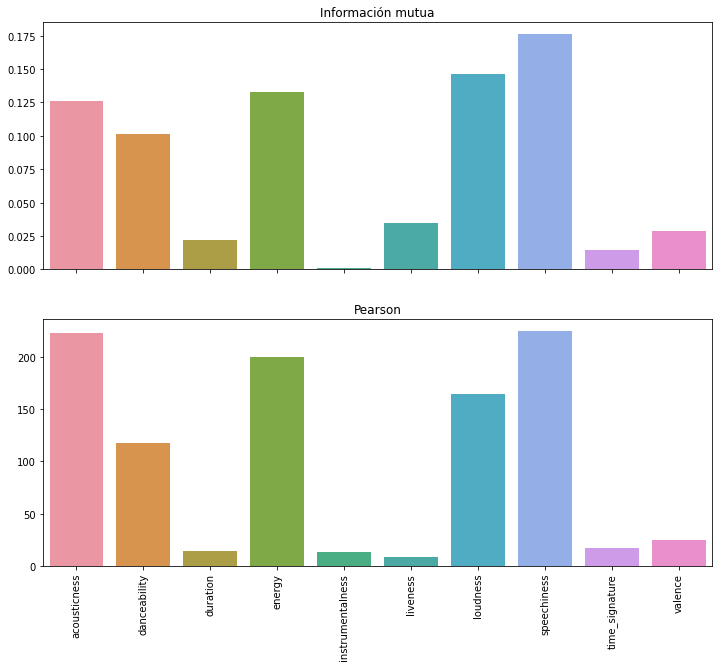

In [70]:
X_train_mi, mi = select_features_mutual_info(df_numeric_x, value_y)
X_train_pc, pc = select_features_pearson(df_numeric_x, value_y)
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
sns.barplot(x=[c for c in df_numeric_x.columns], y=mi.scores_, ax=axes[0])
axes[0].set_title("Información mutua")
axes[0].set_xticklabels([])
sns.barplot(x=[c for c in df_numeric_x.columns], y=pc.scores_, ax=axes[1])
# Grafico el F score de cada feature
axes[1].set_title("Pearson")
axes[1].set_xticklabels(df_numeric_x.columns, rotation=90)
pc.scores_

In [78]:
from pycaret.classification import (
    add_metric,
    setup,
    compare_models,
    models,
    create_model,
    evaluate_model,
    predict_model,
    save_model,
    plot_model
)

In [79]:
RANDOM_STATE = 30

In [80]:
clf1 = setup(
    df,
    target="label",
    train_size=0.7,
    # preprocess = False,
    normalize=True,
    normalize_method="zscore",
    pca=True,
    pca_components=0.9,
    # # remove_outliers = True,
    # # outliters_threshold = 0.05,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,
    fix_imbalance=True,  # SMOTE method
    data_split_shuffle=True,
    data_split_stratify=True,
    fold_strategy="stratifiedkfold",
    fold=5,
    session_id=RANDOM_STATE,
    ## silent=False,
    log_experiment=False,
    experiment_name="Fire-extinguishing",
    use_gpu=False,
)

,Description,Value
0,Session id,30
1,Target,label
2,Target type,Binary
3,Original data shape,"(750, 14)"
4,Transformed data shape,"(858, 12)"
5,Transformed train set shape,"(632, 12)"
6,Transformed test set shape,"(226, 12)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [81]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [82]:
best_model = compare_models(
    include=[
        "lr",  # Logistic Regression
        "knn",  # K-Nearest Neighbors
        "dt",  # Decision Tree Classifier
        "svm",  # SVM - Linear Kernel
        "rbfsvm",  # SVM - Radial Kernel
        "rf",  # Random Forest Classifier
        # RandomForestClassifier(n_estimators=10, random_state=RANDOM_STATE),
    ],
    fold=5,
    cross_validation=True,
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rbfsvm,SVM - Radial Kernel,0.8111,0.8685,0.8261,0.8567,0.8400,0.6093,0.6121,0.2100
rf,Random Forest Classifier,0.8111,0.8846,0.8356,0.8494,0.8415,0.6076,0.6096,0.3820
knn,K Neighbors Classifier,0.7977,0.8545,0.8290,0.8373,0.8312,0.5780,0.5817,0.2280
lr,Logistic Regression,0.7843,0.8827,0.7817,0.8502,0.8139,0.5583,0.5622,0.1220
svm,SVM - Linear Kernel,0.7672,0.0000,0.8102,0.8060,0.8056,0.5145,0.5210,0.0880
dt,Decision Tree Classifier,0.7196,0.7167,0.7311,0.7926,0.7581,0.4245,0.4296,0.1280


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [83]:
rf = create_model ('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8381,0.8690,0.8889,0.8485,0.8682,0.6586,0.6598
1,0.7810,0.8696,0.7619,0.8571,0.8067,0.5560,0.5611
2,0.8190,0.8944,0.8730,0.8333,0.8527,0.6185,0.6196
3,0.8000,0.8918,0.7969,0.8644,0.8293,0.5888,0.5917
4,0.8173,0.8984,0.8571,0.8438,0.8504,0.6159,0.6160
Mean,0.8111,0.8846,0.8356,0.8494,0.8415,0.6076,0.6096
Std,0.0193,0.0127,0.0482,0.0107,0.0213,0.0341,0.0327


Processing:   0%|          | 0/4 [00:00<?, ?it/s]